# Import-ваме библиотеки и алгоритми

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

# Примерно изображение, което използваме при тренирането на класификатора

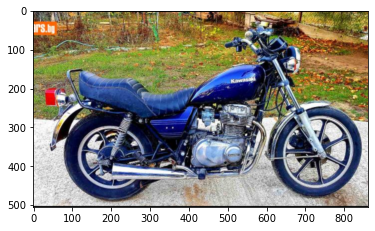

In [5]:
img = image.load_img("basedata/training/A/5.PNG")
plt.imshow(img)

In [6]:
cv2.imread("basedata/training/A/5.PNG").shape # размера на даденото изображение, като 3 е каналите на RGB

(505, 862, 3)

In [7]:
#оразмеряваме данните на матрицата на изображенията за трениране и валидация да са между 0 и 1

In [8]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

# Превръщане на изображенията в датасет

In [14]:
train_dataset = train.flow_from_directory('basedata/training/',
                                         target_size = (200,200), #оразмеряване до 200х200 пиксела
                                         batch_size = 10,          #колко изображения се подават едновременно на алгоритъма
                                         class_mode = 'binary')   #конвертираме класовете в числа (1,2,3...)
validation_dataset = validation.flow_from_directory('basedata/validation/',
                                         target_size = (200,200),
                                         batch_size = 5,
                                         class_mode = 'binary')

Found 616 images belonging to 2 classes.
Found 78 images belonging to 2 classes.


# Дефиниране на модел

In [15]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2), 
                                    #
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #                       
                                    tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    ##
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')                       
])

# Компилиране на модел

In [16]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

# Трениране на модел

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 20,
                     epochs = 10,
                     validation_data = validation_dataset)

Epoch 1/10
20/20 [==============================] - 7s 299ms/step - loss: 0.9936 - accuracy: 0.5200 - val_loss: 0.6850 - val_accuracy: 0.6282
Epoch 2/10
20/20 [==============================] - 6s 290ms/step - loss: 0.7264 - accuracy: 0.5300 - val_loss: 0.6622 - val_accuracy: 0.5769
Epoch 3/10
20/20 [==============================] - 6s 310ms/step - loss: 0.6201 - accuracy: 0.6327 - val_loss: 0.6385 - val_accuracy: 0.7179
Epoch 4/10
20/20 [==============================] - 6s 308ms/step - loss: 0.6402 - accuracy: 0.6700 - val_loss: 0.6595 - val_accuracy: 0.6923
Epoch 5/10
20/20 [==============================] - 6s 305ms/step - loss: 0.4489 - accuracy: 0.7959 - val_loss: 0.5176 - val_accuracy: 0.7821
Epoch 6/10
20/20 [==============================] - 6s 305ms/step - loss: 0.4495 - accuracy: 0.8200 - val_loss: 0.5692 - val_accuracy: 0.7308
Epoch 7/10
20/20 [==============================] - 6s 303ms/step - loss: 0.2969 - accuracy: 0.8950 - val_loss: 0.4331 - val_accuracy: 0.8333
Epoch 

# Тестване на модела

A категория


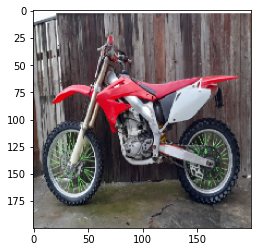

A категория


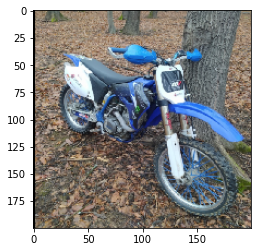

B категория


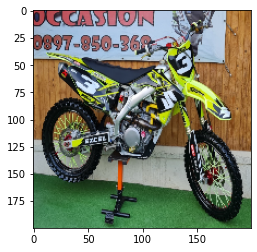

A категория


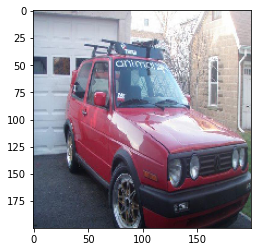

B категория


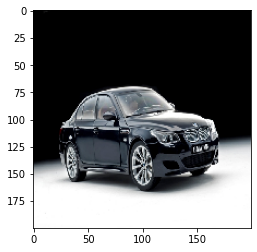

B категория


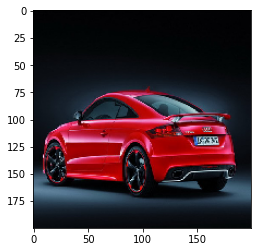

B категория


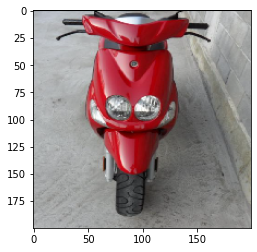

A категория


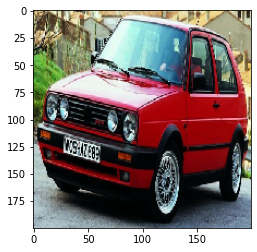

A категория


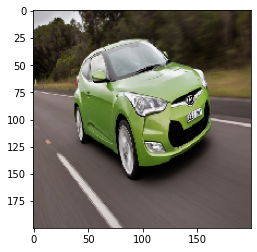

A категория


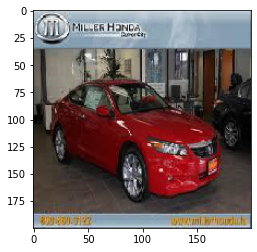

B категория


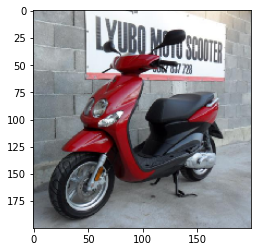

A категория


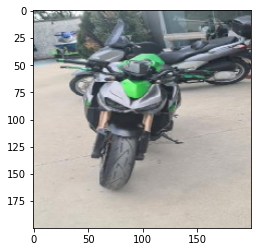

A категория


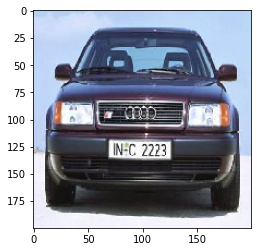

B категория


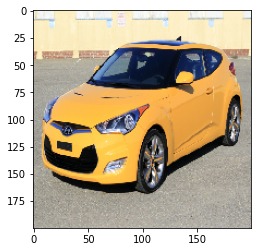

B категория


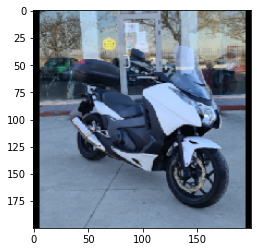

B категория


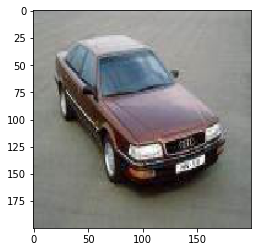

B категория


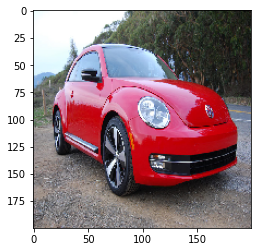

B категория


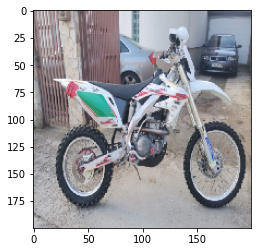

A категория


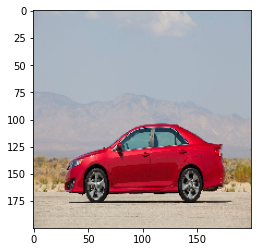

B категория


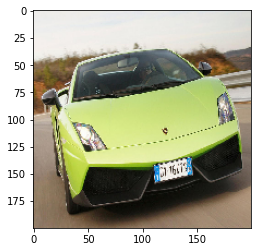

B категория


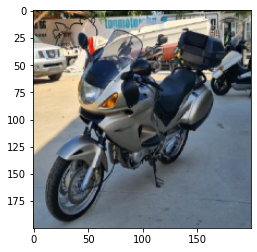

A категория


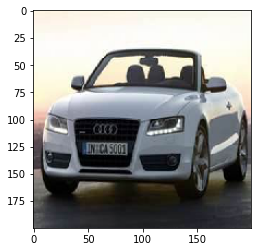

B категория


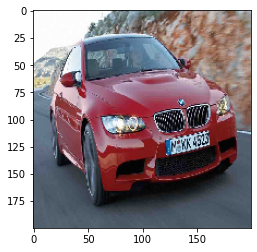

B категория


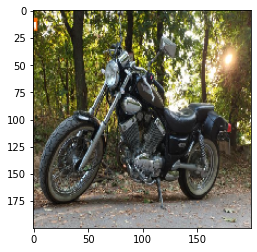

A категория


A категория


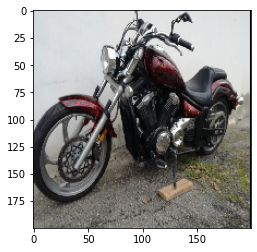

B категория


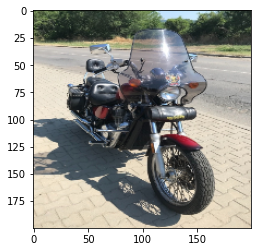

B категория


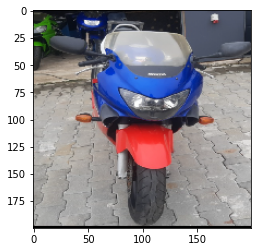

B категория


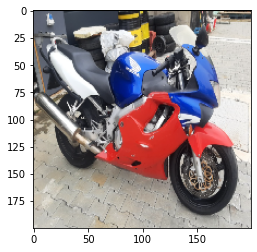

A категория


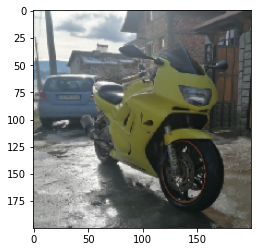

B категория


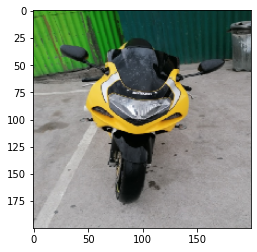

A категория


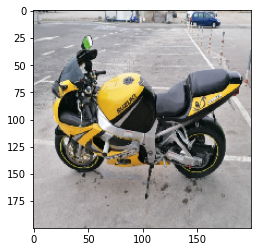

B категория


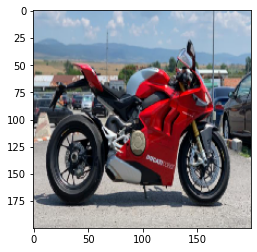

B категория


B категория


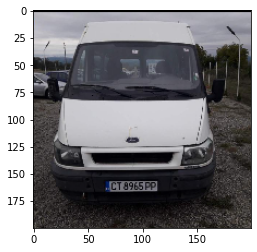

B категория


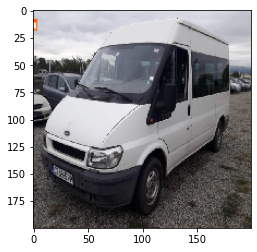

B категория


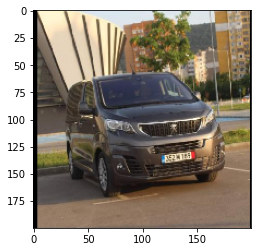

B категория


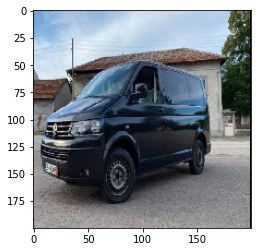

B категория


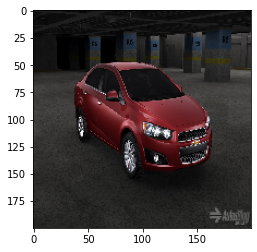

A категория


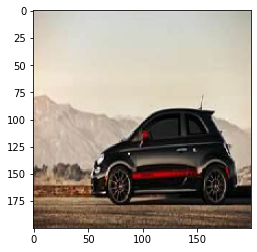

B категория


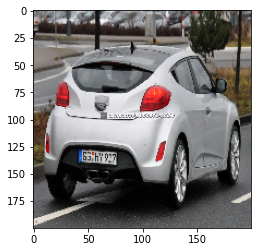

B категория


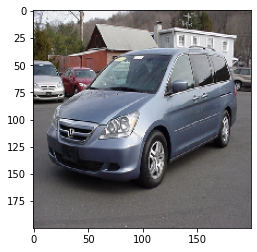

B категория


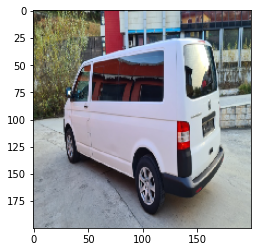

B категория


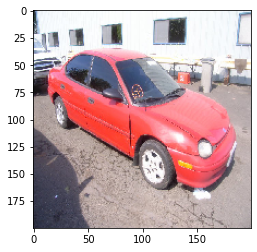

B категория


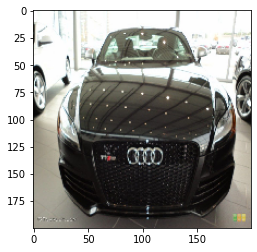

B категория


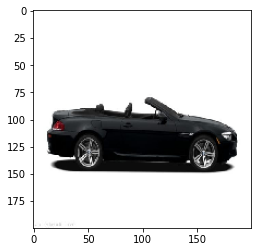

B категория


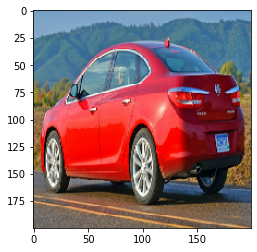

B категория


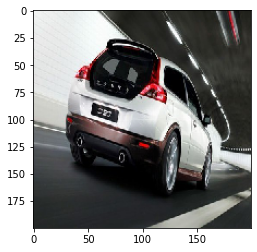

B категория


B категория


B категория


A категория


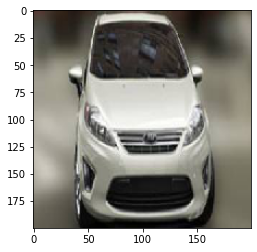

B категория


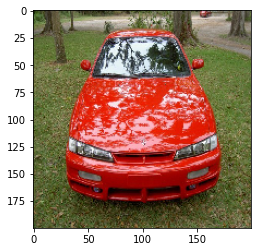

B категория


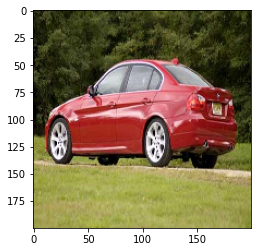

A категория


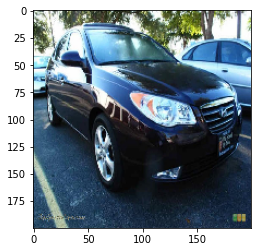

A категория


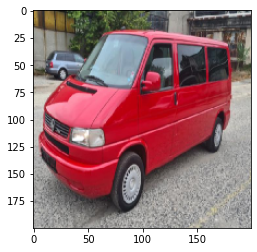

B категория


B категория


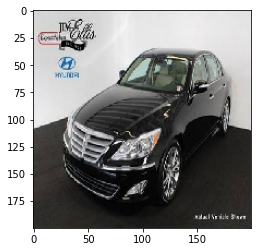

B категория


B категория


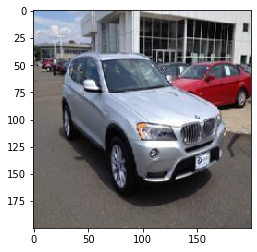

B категория


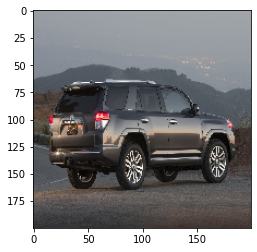

B категория


B категория


B категория


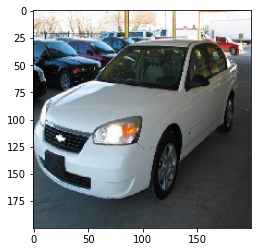

B категория


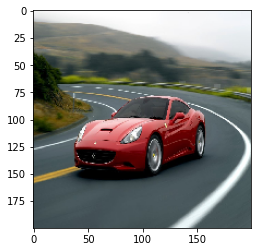

B категория


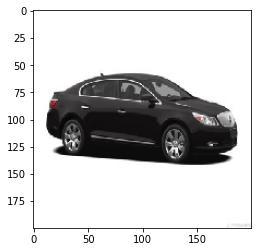

B категория


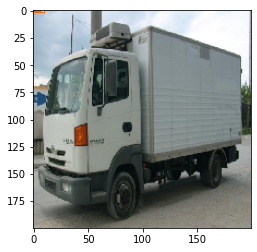

B категория


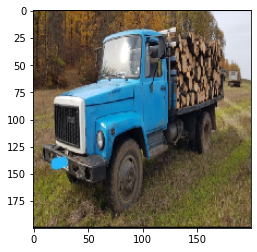

B категория


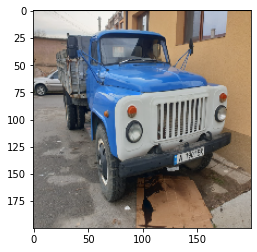

B категория


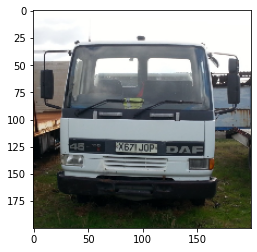

B категория


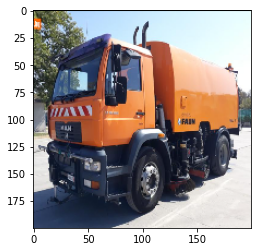

B категория


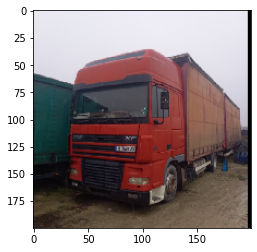

B категория


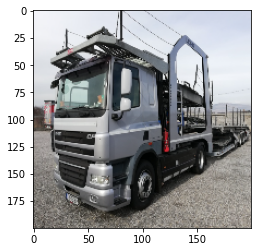

B категория


B категория


A категория


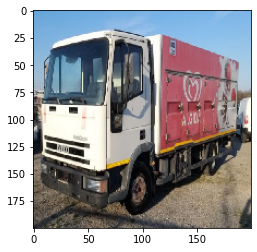

B категория


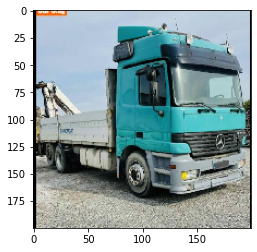

B категория


B категория


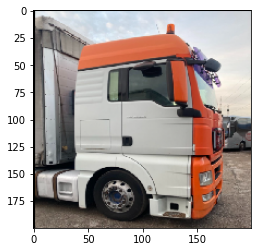

B категория


In [13]:
dir_path = 'basedata/testing/Small_batch'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis = 0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("A категория")
    else val == 1:
        print("B категория")
   